# 利用CNN模型進行手寫數字辨識

## 1. 載入keras等套件

In [3]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


## 2. 從mnist資料庫讀入資料

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 3. 將x 資料型態改為CNN接受的格式

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
# CNN 要的是(28, 28, 1)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
x_train[1234].shape

(28, 28, 1)

## 4. 查看資料內容

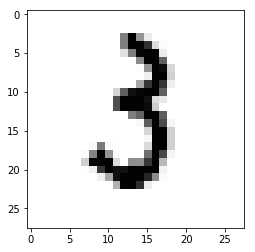

In [8]:
X = x_train[1234]
X = X.reshape(28, 28)
plt.imshow(X, cmap="Greys")

## 5. 基於數字的各自獨立性，對y 進行One-Hot Encoding (10維)處理

In [9]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 6. 將x 資料normalize

In [10]:
x_train = x_train / 255
x_test = x_test / 255

## 7. 建立sequential model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adadelta

model = Sequential()

## 8. 添加網路層數並設定Activation function
* 第一層：  
**Convolution + Maxpooling**  
Filter = 3x3  
Amount = 4  
Activation function = relu    
  
   
* 第二層：  
**Convolution + Maxpooling**  
Filter = 4x4  
Amount = 8  
Activation function = relu    
  

* 第三層：  
**Convolution + Maxpooling**  
Filter = 5x5  
Amount = 16  
Activation function = relu
  
  
* 第四層：  
**Fully-connected NN**  
Dense = 15  
Activation function = relu  
  
  
* 輸出層：  
**Fully-connected NN**  
Dense = 10  
Activation function = softmax  

In [12]:
model.add(Conv2D(4, (3, 3), padding = "same", input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(8, (4, 4), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(16, (5, 5), padding = "same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


## 8. 定義loss function, optimizer 以及learning rate 並進行compile
* **Loss function:**  
Categorical crossentropy  


* **Optimizer:**   
Adadelta    

In [13]:
model.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])
#model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

## 9. 對training data進行fitting
每100筆資料更改一次參數，對所有資料進行10次fitting

In [15]:
model_output = model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 1, validation_data = (x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.3257 - acc: 0.8930 - val_loss: 0.1017 - val_acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0893 - acc: 0.9727 - val_loss: 0.0658 - val_acc: 0.9802
Epoch 3/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0698 - acc: 0.9782 - val_loss: 0.0552 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.0578 - acc: 0.9819 - val_loss: 0.0481 - val_acc: 0.9849
Epoch 5/10
60000/60000 [==============================] - 21s 350us/step - loss: 0.0503 - acc: 0.9844 - val_loss: 0.0457 - val_acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0440 - acc: 0.9860 - val_loss: 0.0446 - val_acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 21s 352us/

## 10. 利用testing data評估結果(accuracy > 95%)

In [1]:
score = model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [38]:
print("loss rate", score[0])
print("accuracy", score[1])

loss rate 0.04718595650040661
accuracy 0.9853


## 11. 畫出model accuracy 和training 次數的關係圖

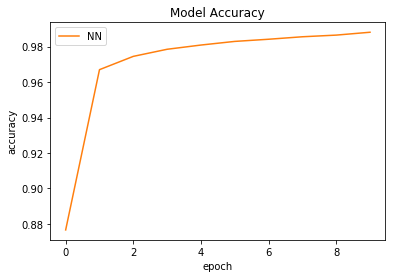

In [39]:
plt.plot(model_output.history["acc"], 'C1')
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["NN"], loc = "best")
plt.show()

## 12. 畫出loss rate 跟training 次數的關係圖

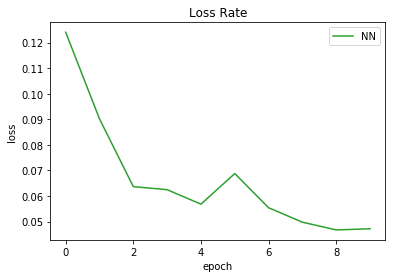

In [40]:
plt.plot(model_output.history["val_loss"], 'C2')
plt.title("Loss Rate")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["NN"], loc = "best")
plt.show()

## 13. 隨便抽取幾組資料來預估結果

In [41]:
predict = model.predict_classes(x_test)

def show_answer(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap="Greys")
    print("NN result = ", predict[index])

NN result =  7


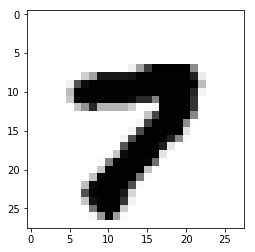

In [42]:
show_answer(79)

NN result =  3


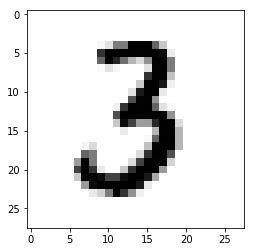

In [44]:
show_answer(3487)

NN result =  1


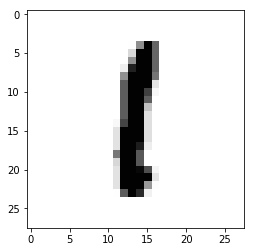

In [45]:
show_answer(5588)

## 14. 結論：可以看出準確率曲線大致平滑，並且在最後能達到98%的準確率